In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
pip install matplotlib

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel('/kaggle/input/adidas/Alt04 -Adidas US Sales Datasets (1).xlsx')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
df.dtypes.count

<bound method Series.count of Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object>

In [6]:
df = df.astype({"Price per Unit":"int","Price per Unit":"int", "Operating Profit":"int","Total Sales":"int"})

In [7]:
df.dtypes.count

<bound method Series.count of Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit               int64
Units Sold                   int64
Total Sales                  int64
Operating Profit             int64
Operating Margin           float64
Sales Method                object
dtype: object>

In [8]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store


In [9]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [10]:
print(df.corr())

                  Retailer ID  Price per Unit  Units Sold  Total Sales  \
Retailer ID          1.000000       -0.392489   -0.003194    -0.083580   
Price per Unit      -0.392489        1.000000    0.264963     0.434696   
Units Sold          -0.003194        0.264963    1.000000     0.913431   
Total Sales         -0.083580        0.434696    0.913431     1.000000   
Operating Profit    -0.027137        0.393389    0.892380     0.956308   
Operating Margin     0.216780       -0.136192   -0.305479    -0.364591   

                  Operating Profit  Operating Margin  
Retailer ID              -0.027137          0.216780  
Price per Unit            0.393389         -0.136192  
Units Sold                0.892380         -0.305479  
Total Sales               0.956308         -0.364591  
Operating Profit          1.000000         -0.211921  
Operating Margin         -0.211921          1.000000  


In [11]:
df1 = df.drop(['Retailer ID'], axis = 1)
df1.head(5)

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store


In [12]:
df1['Operating Margin'] = df1['Total Sales'] - df1['Operating Profit']
df1.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,300000,In-store
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,350000,In-store
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,260000,In-store
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,248625,In-store
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,378000,In-store


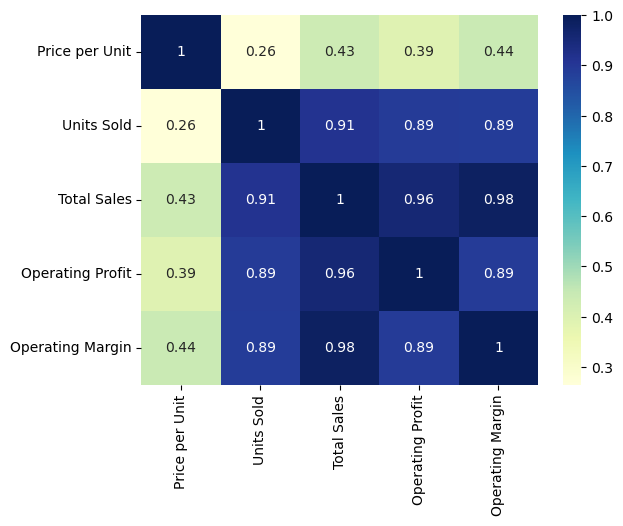

In [13]:
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

In [14]:
X = df1[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']]

In [15]:
print(X)

      Price per Unit  Units Sold  Total Sales  Operating Profit  \
0                 50        1200       600000            300000   
1                 50        1000       500000            150000   
2                 40        1000       400000            140000   
3                 45         850       382500            133875   
4                 60         900       540000            162000   
...              ...         ...          ...               ...   
9643              50          64         3200               896   
9644              41         105         4305              1377   
9645              41         184         7544              2791   
9646              42          70         2940              1234   
9647              29          83         2407               649   

      Operating Margin  
0               300000  
1               350000  
2               260000  
3               248625  
4               378000  
...                ...  
9643              23

# Scaling the Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
minMax = MinMaxScaler()
X2 = pd.DataFrame(minMax.fit_transform(X),columns = minMax.feature_names_in_)
X2.head(2)

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,0.417476,0.941176,0.727273,0.769231,0.529101
1,0.417476,0.784314,0.606061,0.384615,0.617284


In [17]:
X2 = pd.DataFrame(X2, columns = ['Price per Unit','Units Sold','Total Sales','Operating Profit','Operating Margin'])
X2.head()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,0.417476,0.941176,0.727273,0.769231,0.529101
1,0.417476,0.784314,0.606061,0.384615,0.617284
2,0.320388,0.784314,0.484848,0.358974,0.458554
3,0.368932,0.666667,0.463636,0.343269,0.438492
4,0.514563,0.705882,0.654545,0.415385,0.666667


In [18]:
X3 = X2.iloc[:,[0,2]].values
print(X3)

[[0.41747573 0.72727273]
 [0.41747573 0.60606061]
 [0.32038835 0.48484848]
 ...
 [0.33009709 0.00914424]
 [0.33980583 0.00356364]
 [0.21359223 0.00291758]]


In [19]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=11)
  kmeans.fit(X3)

  wcss.append(kmeans.inertia_)

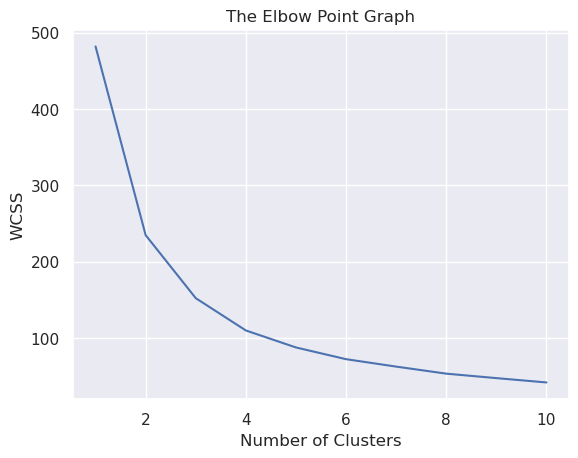

In [20]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimal Clusters are 3

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X3)

print(Y)

[0 0 0 ... 1 1 1]


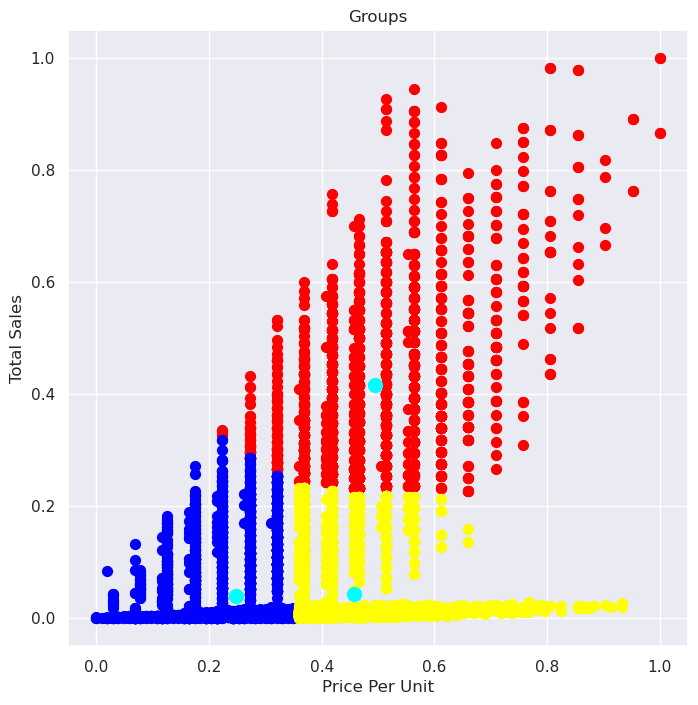

In [22]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X3[Y==0,0], X3[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X3[Y==1,0], X3[Y==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(X3[Y==2,0], X3[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X3[Y==3,0], X3[Y==3,1], s=50, c='black', label='Cluster 4')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Groups')
plt.xlabel('Price Per Unit')
plt.ylabel('Total Sales')
plt.show()

# **Herirachial Clustering (only on numerical values)**

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

Now we can perform hierarchical clustering using the linkage function from scipy.cluster.hierarchy

In [24]:
Z = linkage(X2, 'ward')

**Here, we're using the "ward" linkage method, which minimizes the variance of the distances between the clusters being merged**

**we can plot the resulting dendrogram using the dendrogram function from scipy.cluster.hierarchy**

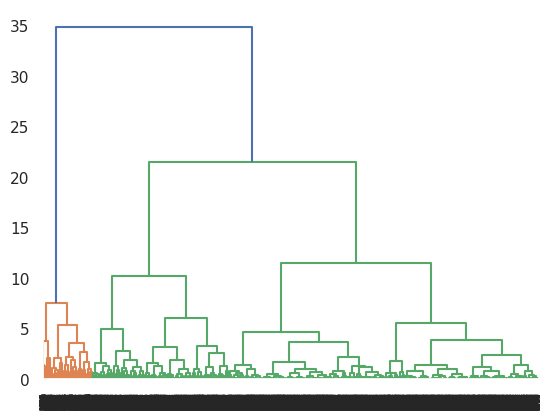

In [25]:
dendrogram(Z)
plt.show()

**This will generate a dendrogram plot that shows the hierarchical clustering of our dataset. The resulting plot should look something like the example I provided earlier.If you want to visualize the clusters themselves instead of just the dendrogram, you can use the fcluster function from scipy.cluster.hierarchy to assign each point to a cluster based on a chosen distance threshold:**

In [26]:
from scipy.cluster.hierarchy import fcluster

max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')

**This will print out the cluster assignments for each point based on the chosen distance threshold. You can then plot the resulting clusters using a scatter plot:**

In [27]:
cluster_sizes = np.bincount(clusters)

In [28]:
largest_clusters = np.argsort(cluster_sizes)[-4:]

In [29]:
largest_cluster_data = [X2[clusters == i] for i in largest_clusters]

In [30]:
print(largest_cluster_data)

[      Price per Unit  Units Sold  Total Sales  Operating Profit  \
285         0.368932    0.215686     0.150000          0.111056   
286         0.271845    0.215686     0.116667          0.086377   
288         0.456311    0.137255     0.116665          0.086377   
289         0.368932    0.215686     0.150000          0.158654   
291         0.368932    0.137255     0.095455          0.070672   
...              ...         ...          ...               ...   
3882        0.407767    0.117647     0.090908          0.048074   
3883        0.563107    0.156863     0.157576          0.083333   
3884        0.466019    0.235294     0.200000          0.126923   
3886        0.466019    0.176471     0.150000          0.111056   
3887        0.368932    0.215686     0.150000          0.079326   

      Operating Margin  
285           0.141866  
286           0.110340  
288           0.110339  
289           0.109127  
291           0.090279  
...                ...  
3882          0.099

# Herirachiel Clustering (using Categorical data)

In [31]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [32]:
Z2 = df[['Retailer','Region','State','City','Product']]
Z2.head()

,Retailer,Region,State,City,Product
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear
4,Foot Locker,Northeast,New York,New York,Men's Apparel


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

one_hot = pd.get_dummies(Z2,columns = ['Retailer','Region','State','City','Product'])
one_hot

,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Apparel,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9644,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9645,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9646,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [34]:
Uncoded = pd.get_dummies(one_hot).idxmax(1)
print(Uncoded)
Uncoded_op = Uncoded.to_excel('Uncoded_output.xlsx', index = False)

0       Retailer_Foot Locker
1       Retailer_Foot Locker
2       Retailer_Foot Locker
3       Retailer_Foot Locker
4       Retailer_Foot Locker
                ...         
9643    Retailer_Foot Locker
9644    Retailer_Foot Locker
9645    Retailer_Foot Locker
9646    Retailer_Foot Locker
9647    Retailer_Foot Locker
Length: 9648, dtype: object


In [35]:
Z3 = linkage(one_hot, 'ward')

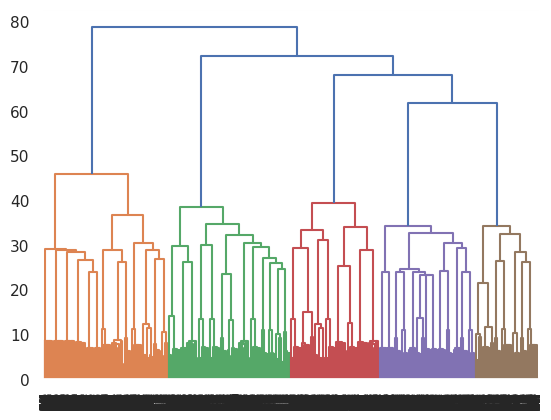

In [36]:
dendrogram(Z3)
plt.show()

# Heriarchial Clustering using all data 

In [37]:
Data = pd.concat([one_hot, X], axis =1)
Data.head()

,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,50,1200,600000,300000,300000
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,50,1000,500000,150000,350000
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,40,1000,400000,140000,260000
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,45,850,382500,133875,248625
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,60,900,540000,162000,378000


In [38]:
All_Data = linkage(Data, 'ward')

In [39]:
#dendrogram(All_Data)
#plt.show()

**Extracting the data**

In [40]:
from scipy.cluster.hierarchy import fcluster

max_d = 5
clusters = fcluster(All_Data, max_d, criterion='distance')

In [41]:
cluster_sizes = np.bincount(clusters)

In [42]:
largest_clusters = np.argsort(cluster_sizes)[-4:]

In [43]:
All_Data = pd.DataFrame(All_Data)
All_Data.head()

,0,1,2,3
0,0.0,18.0,0.0,2.0
1,4.0,10.0,0.0,2.0
2,5.0,11.0,0.0,2.0
3,7.0,19.0,0.0,2.0
4,8.0,14.0,0.0,2.0


In [44]:
pip install xlsxwriter

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 kB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn.cluster import AgglomerativeClustering

# No of clusters we want to generate
n_clusters = 4

# hierarchical clustering
agg_model = AgglomerativeClustering(n_clusters= 4, linkage='ward')
labels = model.fit_predict(Data)

NameError: name 'model' is not defined

In [ ]:
agg_labels = agg_model.labels_
silhouette_avg = silhouette_score(Data, agg_labels)

print("The average silhouette score for hierarchical clustering is", silhouette_avg)

# Mapping the dummies categorical variables

In [ ]:
retailer_cols = [col for col in Data.columns if col.startswith('Retailer_')]
region_cols = [col for col in Data.columns if col.startswith('Region_')]
state_cols = [col for col in Data.columns if col.startswith('State_')]
city_cols = [col for col in Data.columns if col.startswith('City_')]
product_cols = [col for col in Data.columns if col.startswith('Product_')]

In [ ]:
retailer_data = Data[retailer_cols].idxmax(axis=1).str.replace('Retailer_', '')
region_data = Data[region_cols].idxmax(axis=1).str.replace('Region_', '')
state_data = Data[state_cols].idxmax(axis=1).str.replace('State_', '')
city_data = Data[city_cols].idxmax(axis=1).str.replace('City_', '')
product_data = Data[product_cols].idxmax(axis=1).str.replace('Product_', '')

In [ ]:
Data['Retailer'] = retailer_data
Data['Region'] = region_data
Data['State'] = state_data
Data['City'] = city_data
Data['Product'] = product_data

In [ ]:
Data.drop(columns=retailer_cols + region_cols + state_cols + city_cols + product_cols, inplace=True)

In [ ]:
clusters = []
for i in range(n_clusters):
    cluster_i = Data.loc[labels == i]
    clusters.append(cluster_i)

writer = pd.ExcelWriter('clusters.xlsx', engine='xlsxwriter')
for i, cluster in enumerate(clusters):
    sheet_name = f"Cluster {i}"
    cluster.to_excel(writer, sheet_name=sheet_name, index=False)
writer.save()

In [ ]:
clusters_data = pd.read_excel('/kaggle/working/clusters.xlsx')
cluster.head()

# Clustering using DBSCAN Method (Numerical Data)

In [ ]:
from sklearn.cluster import DBSCAN

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Define a custom scorer function based on silhouette score
silhouette_scorer = make_scorer(silhouette_score)

# Define the range of parameter values to search over
param_grid = {'eps': [0.1, 0.5, 1, 2, 5],
              'min_samples': [1,2,3,4,5,6,7,8,9,10, 20, 50]}

# Create a DBSCAN object
dbscan = DBSCAN()

# Perform grid search over parameter values using the custom scorer
grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_scorer)
grid_search.fit(X)  # X is your data

# Extract the best parameters and compute silhouette score
best_params = grid_search.best_params_
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
clusters = dbscan.fit_predict(X)
silhouette = silhouette_score(X, clusters)
print("Optimal parameters:", best_params)
print("Silhouette score:", silhouette)


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 759, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  UserWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/model_selec

Optimal parameters: {'eps': 0.1, 'min_samples': 1}
Silhouette score: 0.3087686567164179


In [ ]:
eps = 0.5
min_samples = 3

In [ ]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

In [ ]:
X.head()

In [ ]:
# Fitting the model

model=dbscan.fit(X)

labels=model.labels_

In [ ]:
from sklearn.metrics import silhouette_score

labels = dbscan.labels_
silhouette_avg = silhouette_score(X, labels)

print("The average silhouette score for DBSCAN is", silhouette_avg)

In [46]:
import seaborn as sns
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters)

TypeError: '(slice(None, None, None), 0)' is an invalid key

# Clustering using categorical variable

In [ ]:
one_hot_dbscan = DBSCAN(eps=eps, min_samples=min_samples)

one_hot_db_model=dbscan.fit(one_hot)

one_hot_labels= one_hot_db_model.labels_

from sklearn.metrics import silhouette_score

labels = dbscan.labels_
silhouette_one_hot_avg = silhouette_score(one_hot, one_hot_labels)

print("The average silhouette score for DBSCAN is", silhouette_avg)

,Retailer_Amazon,Retailer_Foot Locker,Retailer_Kohl's,Retailer_Sports Direct,Retailer_Walmart,Retailer_West Gear,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,50,1200,600000,300000,300000
1,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,50,1000,500000,150000,350000
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,40,1000,400000,140000,260000
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,45,850,382500,133875,248625
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,60,900,540000,162000,378000


In [61]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store


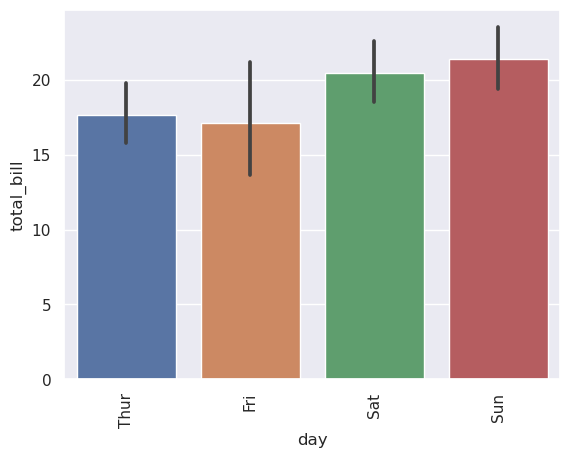

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from Seaborn
tips = sns.load_dataset("tips")

# Create a horizontal barplot
ax = sns.barplot(x="day", y="total_bill", data=tips)

# Set the x-labels to be displayed vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Show the plot
plt.show()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 27, saw 367
